Here we make a comoving system in 3D. The procedure is very simmilar to how it is done in 2D. We start by setting the potential to a gaussian and initialise the wave function by relaxing the Thomas-Fermi ground state.

[0.00304966 0.50154654 1.00004342]


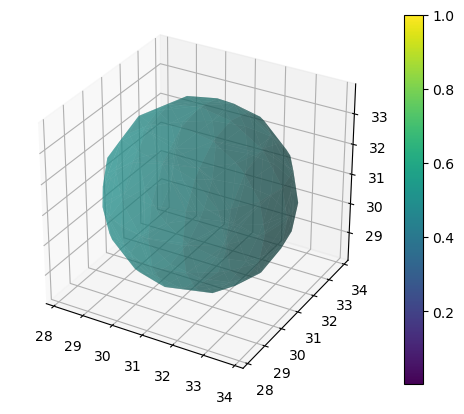

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import comfit as cf

bec = cf.BEC(3,xRes=64,yRes=64,zRes=64,gamma=0,dt=0.1)

bec.V0 = bec.calc_gaussian_stirring_potential(2,4,[bec.xmid,bec.ymid,bec.zmid])

bec.set_initial_condition_Thomas_Fermi()
bec.evolve_relax_BEC(100)

bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False,colormap = 'winter')
plt.show()


We now set the dissipative frame

[0.00157973 0.44118845 0.88079716]


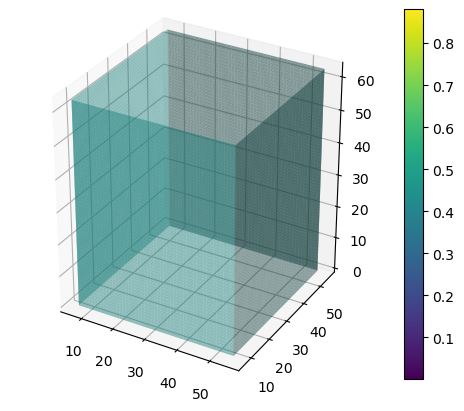

In [2]:
bec.conf_dissipative_frame(wx=25,wy=25,wz=25)

bec.plot_field(bec.gamma,cmap_symmetric=False)
plt.show()

bec.psi += (0.01*np.random.randn(bec.xRes,bec.yRes,bec.zRes)+ 0.01*np.random.randn(bec.xRes,bec.yRes,bec.zRes)*(1j))*np.abs(bec.psi)**2

Now the system will be evolved in the comoving frame. We sett the stirer velocity to 0.8. This will produce vortex rings that are removed by the dissipative frame.

[5.86850174e-04 5.65474978e-01 1.13036311e+00]


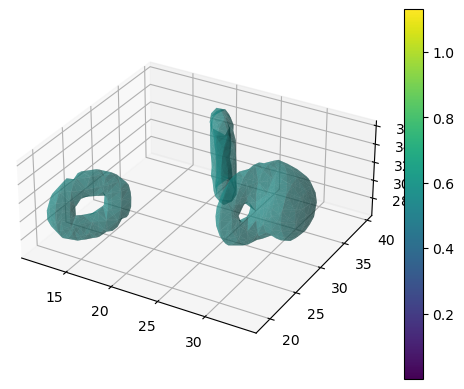

In [5]:
vel_x = 0.8

t_max = 100

timesteps = int(t_max/bec.dt)


bec.evolve_comoving_dGPE(timesteps,vel_x,method='ETD4RK')


    

ax=bec.plot_field(np.abs(bec.psi)**2,cmap_symmetric=False)

plt.show()